In [147]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [148]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
print(df.shape)
# (1338, 7)

(1338, 7)


In [150]:
display(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [151]:
display(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

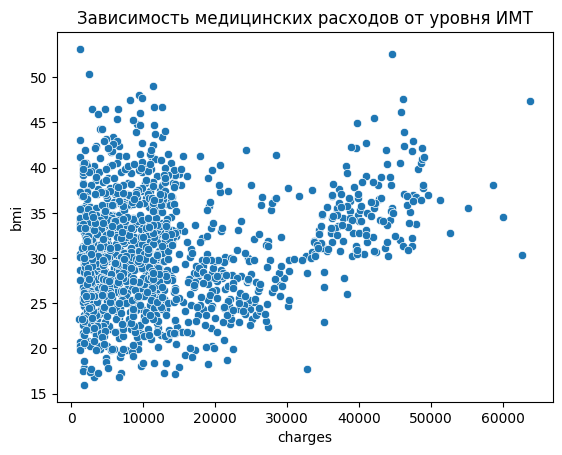

In [152]:
scatterplot = sns.scatterplot(df, y='bmi', x='charges')
scatterplot.set_title('Зависимость медицинских расходов от уровня ИМТ');

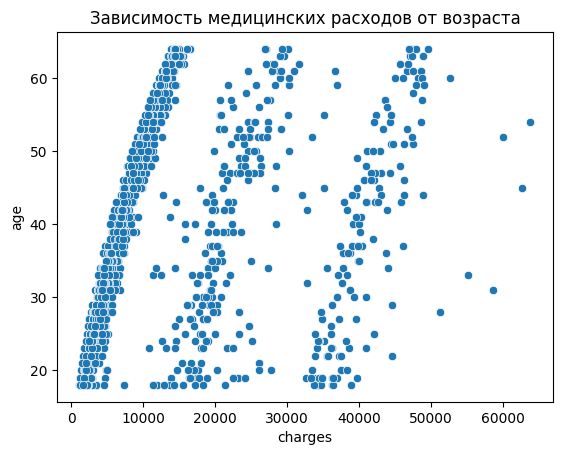

In [153]:
scatterplot = sns.scatterplot(df, y='age', x='charges')
scatterplot.set_title('Зависимость медицинских расходов от возраста');

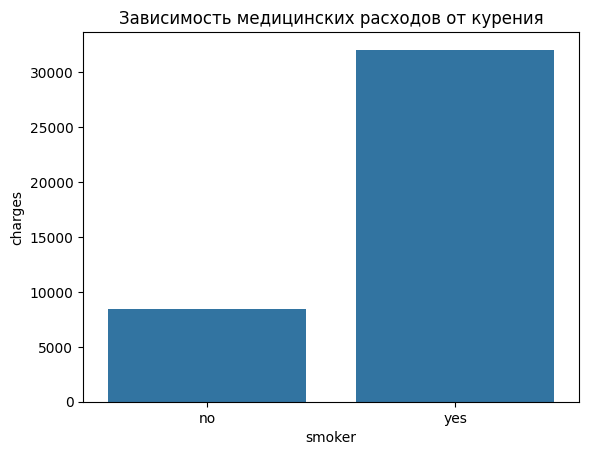

In [154]:
data_smokers = df.groupby('smoker')['charges'].mean()
barplot = sns.barplot(data_smokers)
barplot.set_title('Зависимость медицинских расходов от курения');

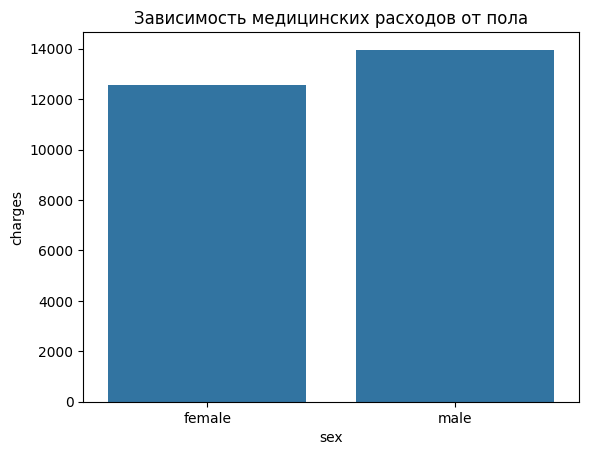

In [155]:
data_sex = df.groupby('sex')['charges'].mean()
barplot = sns.barplot(data_sex)
barplot.set_title('Зависимость медицинских расходов от пола');

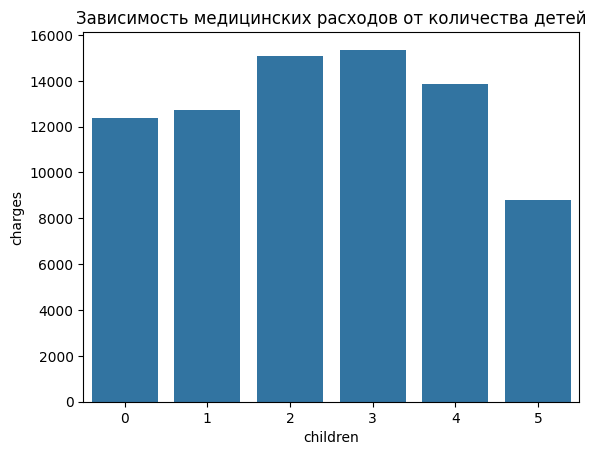

In [156]:
data_children = df.groupby('children')['charges'].mean()
barplot = sns.barplot(data_children)
barplot.set_title('Зависимость медицинских расходов от количества детей');

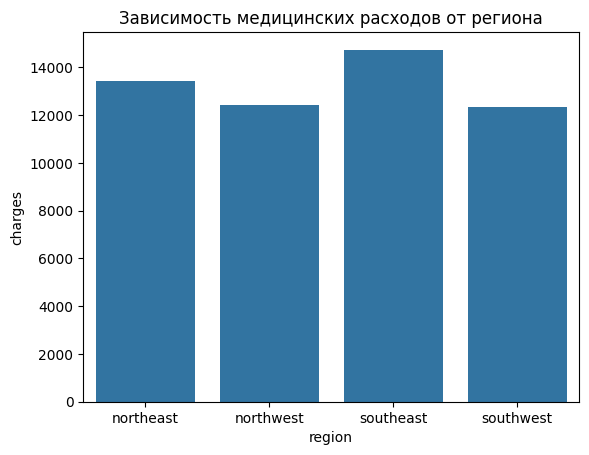

In [157]:
data_region = df.groupby('region')['charges'].mean()
barplot = sns.barplot(data_region)
barplot.set_title('Зависимость медицинских расходов от региона');

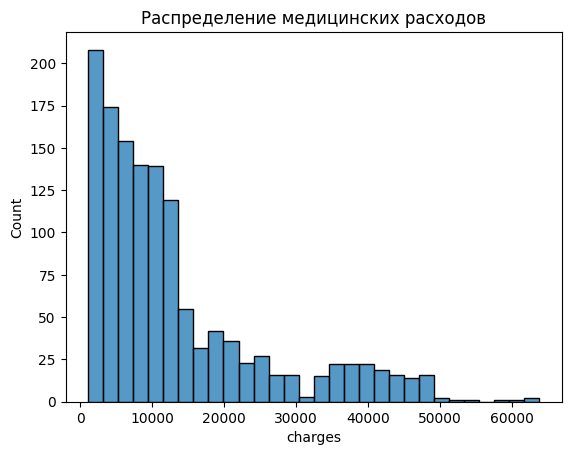

In [158]:
histplot = sns.histplot(df['charges'])
histplot.set_title('Распределение медицинских расходов');

In [159]:
#кодируем бинарные категориальные признаки
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
df = pd.get_dummies(df, dtype='int')
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [160]:
features = df.drop('charges', axis=1).columns
X, y = df[features], df['charges']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [162]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0: -12525.547811195447
w1: [  256.85635254  -131.3143594    339.19345361   475.50054515
 23848.53454191   587.00923503   234.0453356   -448.01281436
  -373.04175627]


In [163]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train) # Обучаем модель, теперь она может взять в себя новые признаки и посчитать целевую переменную
print(f'Свободный член: {linear_reg.intercept_}')
print(f'Коэффициенты: {linear_reg.coef_}')

Свободный член: -12390.804294570275
Коэффициенты: [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


In [164]:
y_predict = linear_reg.predict(X_train) 
print(f'MAE score {round(metrics.mean_absolute_error(y_train, y_predict), 2)}')
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y_train, y_predict), 2) * 100}')
print(f'R2 score {round(metrics.r2_score(y_train, y_predict), 3)}')

MAE score 4208.23
MAPE score 42.0
R2 score 0.742


In [165]:
y_predict_t = linear_reg.predict(X_test)
print(f'MAE score {round(metrics.mean_absolute_error(y_test, y_predict_t))}')
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y_test, y_predict_t), 2) * 100}')
print(f'R2 score {round(metrics.r2_score(y_test, y_predict_t), 3)}')

MAE score 4181
MAPE score 47.0
R2 score 0.784


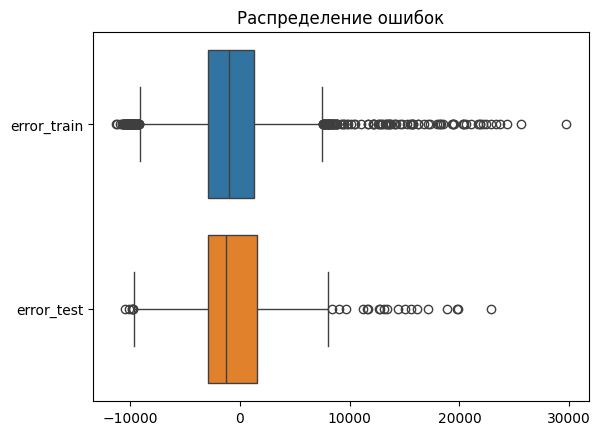

In [166]:
error_train = y_train - y_predict
error_test = y_test - y_predict_t
df_error = pd.DataFrame({'error_train':error_train, 
                         'error_test':error_test})
sns.boxplot(df_error, orient='h')
plt.title('Распределение ошибок');

In [167]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [171]:
linear_poly = linear_model.LinearRegression()
linear_poly.fit(X_train_scaled_poly, y_train)
y_predict_poly_test = linear_poly.predict(X_test_scaled_poly)
print(metrics.r2_score(y_test, y_predict_poly_test))

0.8665830903164837


In [172]:
print(linear_poly.intercept_)
print(linear_poly.coef_)

2227.734564440352
[ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]


In [178]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_test_predict_lasso = lasso_lr_poly.predict(X_test_scaled_poly)

print(f'MAE score {round(metrics.mean_absolute_error(y_test, y_test_predict_lasso))}')
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_lasso), 2) * 100}')
print(f'R2 score {round(metrics.r2_score(y_test, y_test_predict_lasso), 3)}')

MAE score 2719
MAPE score 30.0
R2 score 0.867


In [180]:
print(lasso_lr_poly.intercept_)
print(lasso_lr_poly.coef_)

2249.713524103523
[ 3.24221653e+03 -4.92313816e+02  5.07612317e+03  4.58362056e+03
  1.97928569e+03  1.88025707e+02 -4.70775218e+02  5.83657101e+02
 -2.43543456e+02  8.29826751e+03  7.74581954e+02  8.44448593e+02
 -1.20775688e+03  1.34809915e+02 -1.04309726e+03 -0.00000000e+00
  1.16964229e+03  1.61765564e+03 -0.00000000e+00  5.05847740e+02
 -1.13425152e+03  2.65796922e+02 -1.22240479e+03  0.00000000e+00
  2.36213242e+02 -5.80031340e+02 -8.17963257e+03  1.29487768e+03
  5.47148553e+04  3.58531873e+03  2.40690210e+03 -9.63549427e+02
  0.00000000e+00 -1.67464337e+03 -2.05436459e+03  1.94204864e+03
  1.95394442e+03 -0.00000000e+00 -1.06364416e+03  8.00606774e+00
  5.93688978e+02 -0.00000000e+00 -2.30643423e+02  1.97933477e+03
  6.31615519e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.05849873e-01]


In [179]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
y_test_predict_ridge = ridge_lr_poly.predict(X_test_scaled_poly)

print(f'MAE score {round(metrics.mean_absolute_error(y_test, y_test_predict_ridge))}')
print(f'MAPE score {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_ridge), 2) * 100}')
print(f'R2 score {round(metrics.r2_score(y_test, y_test_predict_ridge), 3)}')

MAE score 2861
MAPE score 31.0
R2 score 0.863


In [181]:
print(ridge_lr_poly.intercept_)
print(ridge_lr_poly.coef_)

2450.9757632240307
[ 3369.38386245  -457.59604061  3655.82413935  3198.89989857
  2682.62197133   199.05715111  -228.717235     191.94660929
  -162.28652539  7548.51142058   581.66782381   935.50427948
  -681.52086519   663.45387027  -450.92174702   438.63623056
  1406.72601433  1974.94336458  -457.59604061   947.62267378
  -902.74408745   739.02044241  -822.63208356   302.52583364
   351.60830856  -289.09809926 -4274.11806366  2734.55631801
 44541.21377369  3667.33801864  1719.64618126 -1249.79159858
  -481.36846198 -1314.96604775 -2172.72264458  2171.5603185
  1997.18187938   112.64828732 -1082.49058663  2682.62197133
    94.23317954  -208.05994803   535.71682279  2260.73191704
   199.05715111     0.             0.             0.
  -228.717235       0.             0.           191.94660928
     0.          -162.28652539]
